In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Extract images
!tar -xzf ./data/images.tar.gz -C ./data

# Save image name into filenames.txt
!ls data/images > data/filenames.txt

In [3]:
img_path = './data/images/'
df = pd.read_csv('./data/filenames.txt',  names=['filename'])
df['filepath'] = img_path + df['filename']
df

,filename,filepath
0,Abyssinian_100.jpg,./data/images/Abyssinian_100.jpg
1,Abyssinian_100.mat,./data/images/Abyssinian_100.mat
2,Abyssinian_101.jpg,./data/images/Abyssinian_101.jpg
3,Abyssinian_101.mat,./data/images/Abyssinian_101.mat
4,Abyssinian_102.jpg,./data/images/Abyssinian_102.jpg
...,...,...
7388,yorkshire_terrier_96.jpg,./data/images/yorkshire_terrier_96.jpg
7389,yorkshire_terrier_97.jpg,./data/images/yorkshire_terrier_97.jpg
7390,yorkshire_terrier_98.jpg,./data/images/yorkshire_terrier_98.jpg
7391,yorkshire_terrier_99.jpg,./data/images/yorkshire_terrier_99.jpg


In [4]:
# Remove extension and numbers
def clean_filenames(filename: str) -> str:
    cut_position = filename.rfind('_')
    filename = filename[:cut_position]
    return filename

Generating a **breed** column for further analysis and an **extension** column to see what kind of files are in this dataset

In [8]:
df['breed'] = df['filename'].apply(clean_filenames)
df['extension'] = df['filename'].apply(lambda x: x[x.find('.'):])
df.head()

,filename,filepath,breed,extension
0,Abyssinian_100.jpg,./data/images/Abyssinian_100.jpg,Abyssinian,.jpg
1,Abyssinian_100.mat,./data/images/Abyssinian_100.mat,Abyssinian,.mat
2,Abyssinian_101.jpg,./data/images/Abyssinian_101.jpg,Abyssinian,.jpg
3,Abyssinian_101.mat,./data/images/Abyssinian_101.mat,Abyssinian,.mat
4,Abyssinian_102.jpg,./data/images/Abyssinian_102.jpg,Abyssinian,.jpg


In [9]:
df.describe()

,filename,filepath,breed,extension
count,7393,7393,7393,7393
unique,7393,7393,37,2
top,Abyssinian_100.jpg,./data/images/Abyssinian_100.jpg,Abyssinian,.jpg
freq,1,1,203,7390


**Some interesting things to notes here:**
- There are 7393 files in this dataset
- There are 37 different breeds
- There are 2 types of extension and the most frequent one has 7390 entries. It means that the other one has only 3 occurrences. Opening these files was not possible, so all 3 files will be ignored during this work.


In [11]:
df['extension'].value_counts()

.jpg    7390
.mat       3
Name: extension, dtype: int64

In [13]:
# Keeping only .jpg files in the dataframe
df = df[df['extension']=='.jpg']

In [15]:
# Compute how many images from each breed is in the dataset
df['breed'].value_counts()

Abyssinian                    200
Ragdoll                       200
Maine_Coon                    200
miniature_pinscher            200
newfoundland                  200
Persian                       200
pomeranian                    200
pug                           200
Russian_Blue                  200
american_bulldog              200
saint_bernard                 200
samoyed                       200
shiba_inu                     200
Siamese                       200
Sphynx                        200
wheaten_terrier               200
leonberger                    200
keeshond                      200
japanese_chin                 200
havanese                      200
american_pit_bull_terrier     200
basset_hound                  200
beagle                        200
Bengal                        200
Birman                        200
Bombay                        200
boxer                         200
British_Shorthair             200
chihuahua                     200
Egyptian_Mau  

**It looks like the dataset has the breeds well distributed, even though the last ones has different numbers**

In [16]:
unique = df.drop_duplicates(subset='breed')
unique

,filename,filepath,breed,extension
0,Abyssinian_100.jpg,./data/images/Abyssinian_100.jpg,Abyssinian,.jpg
203,american_bulldog_100.jpg,./data/images/american_bulldog_100.jpg,american_bulldog,.jpg
403,american_pit_bull_terrier_100.jpg,./data/images/american_pit_bull_terrier_100.jpg,american_pit_bull_terrier,.jpg
603,basset_hound_100.jpg,./data/images/basset_hound_100.jpg,basset_hound,.jpg
803,beagle_100.jpg,./data/images/beagle_100.jpg,beagle,.jpg
1003,Bengal_100.jpg,./data/images/Bengal_100.jpg,Bengal,.jpg
1203,Birman_100.jpg,./data/images/Birman_100.jpg,Birman,.jpg
1403,Bombay_100.jpg,./data/images/Bombay_100.jpg,Bombay,.jpg
1603,boxer_100.jpg,./data/images/boxer_100.jpg,boxer,.jpg
1803,British_Shorthair_100.jpg,./data/images/British_Shorthair_100.jpg,British_Shorthair,.jpg


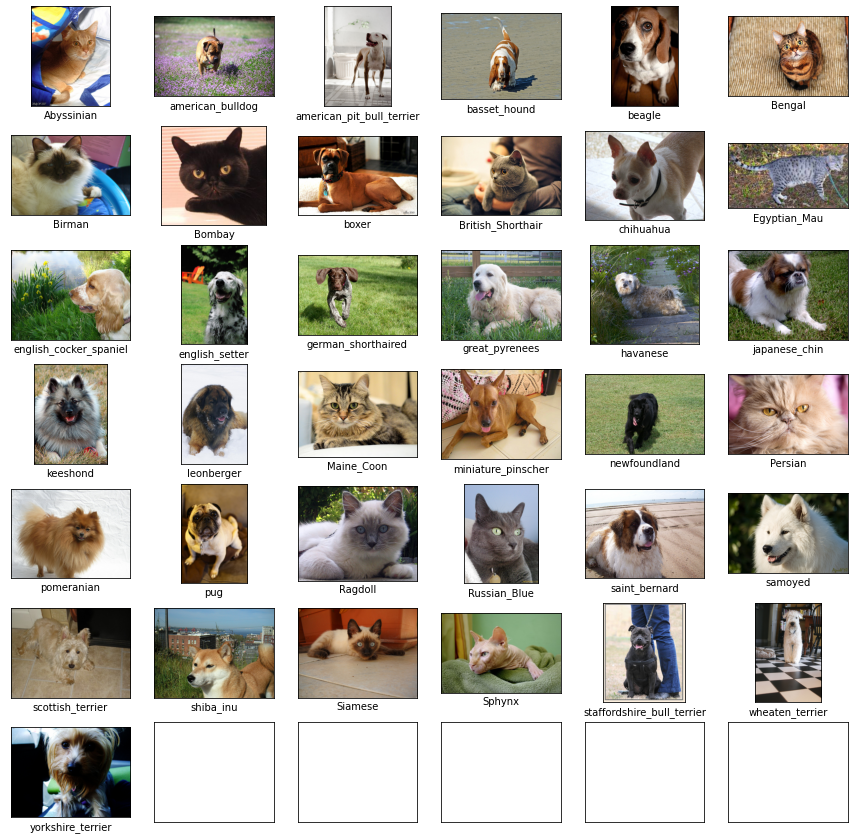

In [20]:
from PIL import Image

fig, ax = plt.subplots(7, 6, figsize=(15,15), subplot_kw={'xticks': [], 'yticks': []})
loc = 0

for i in range(7):
    for j in range(6):
        with Image.open('./data/images/'+unique['filename'].iloc[loc]) as im:
            ax[i, j].axis = 0
            ax[i, j].set_xlabel(unique.iloc[loc]['breed'])
            ax[i, j].imshow(im)
            loc += 1
            if loc==37: break


**All cats breeds begins with capital letter. To create a column with the information 'cat or dog' this info will be used**

In [44]:
# Split the breeds
cats = unique[unique['breed'].str.istitle()]['breed']
dogs = unique[unique['breed'].str.islower()]['breed']

**Generating a column containing the information if it is a cat or a dog**

In [45]:
df['cat_or_dog'] = None
df['cat_or_dog'][df['breed'].isin(dogs)] = 'dog'
df['cat_or_dog'][df['breed'].isin(cats)] = 'cat'

In [46]:
df['cat_or_dog'].head()

0    cat
2    cat
4    cat
6    cat
7    cat
Name: cat_or_dog, dtype: object

In [47]:
df['cat_or_dog'].value_counts()

dog    4990
cat    2400
Name: cat_or_dog, dtype: int64

In [48]:
# Percentage of each class
df['cat_or_dog'].value_counts()*100/len(df)

dog    67.523681
cat    32.476319
Name: cat_or_dog, dtype: float64

**Looking at the percentage of each class is evident that this dataset is unbalanced.**

In [49]:
# Saving the dataframe for further use
df.to_csv('./data/dataframe.csv')